In [2]:
import pandas as pd
import numpy as np,os,glob,matplotlib.pyplot as plt

df=pd.read_csv('kaggle_train.csv')


X=df.loc[:,["percent_atom_al","percent_atom_ga","percent_atom_in","formation_energy_ev_natom"]]
y=df["bandgap_energy_ev"]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Train model using sklearn package

In [4]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)


print(reg.coef_)

print(reg.intercept_)


[-64.94888833 -67.29178801 -68.34303069  -4.49330987]
69.62987572366357


In [5]:
y_prediction=reg.predict(X_test)


### Check prediction on rest of the 20% data

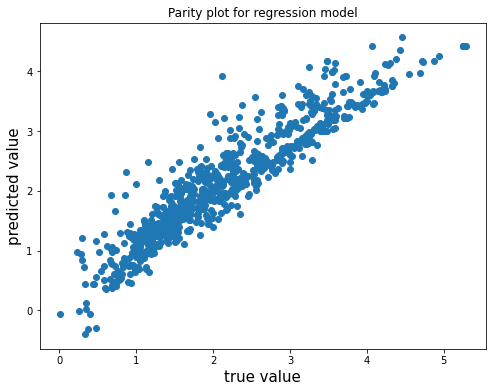

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_prediction)
plt.xlabel('true value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title('Parity plot for regression model')
plt.show()

### Lasso

In [10]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,y_train)

Lasso(alpha=0.1)

In [11]:
y_prediction_lasso=clf.predict(X_test)


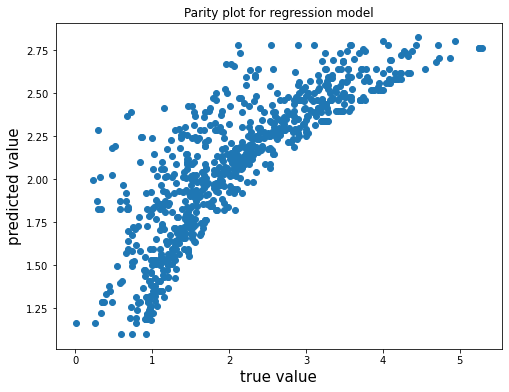

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_prediction_lasso)
plt.xlabel('true value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title('Parity plot for regression model')
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error

print("without lasso, mae is: {}".format(mean_absolute_error(y_test,y_prediction)))
print("with lasso, mae is: {}".format(mean_absolute_error(y_test,y_prediction_lasso)))

without lasso, mae is: 0.2850976141181816
with lasso, mae is: 0.5652949306422843
